In [103]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import *
get_ipython().magic(u'matplotlib inline')

In [104]:
# 1).

In [105]:
#funciones para la integracion y metodo para la misma

#Primera integral por el metodo de impropias
def I_1(u):
    a = 0.0
    p = 0.5
    P_4 = 1.0 - (u-a) + (u-a)**2.0/2.0 - (u-a)**3.0/6.0 + (u-a)**4.0/24.0
    den = (u-a)**p
    return (np.exp(-u)-P_4) / (den*np.pi**0.5) 

#Segunda integral por el metodo de impropias
def I_2(u):
    a = 0.0
    p = 0.5
    P_4 = 1.0 - (u-a) + (u-a)**2.0/2.0 - (u-a)**3.0/6.0 + (u-a)**4.0/24.0
    den = (u-a)**p
    return P_4/(den*np.pi**0.5)

#Metodo de integracion

#Metodo de Simpson
def Simpson(h,ly):
    simpson =  h*( ly[0] + 4.0*ly[1] + ly[-1] )/3.0
    return simpson

In [106]:
# Funcion de error:
def ErrorFunction(x):
    #Listas
    x_c = x**2.0
    xs = np.linspace(1e-5,x_c,10000)

    Is1 = I_1(xs)
    Is2 = I_2(xs)

    #print len(xs)
    
    #Integracion con Simpson
    lim = int(len(xs)/2.0)
    h = abs(xs[1]-xs[0])

    Sol1 = [] #Solucion a la primera integral
    Sol2 = [] #Solucion a la segunda integral
    SolT = [] #Solucion total a la integral como la suma de las otras 2

    Suma1=0.0
    Suma2=0.0
    
    for i in xrange(0,lim):
        Suma1 = Suma1 + Simpson(h, Is1[2*i:2*i+3])
        Sol1.append(Suma1)
                                   
        Suma2 = Suma2 + Simpson(h, Is2[2*i:2*i+3])
        Sol2.append(Suma2) 

    for i in xrange(0,len(Sol1)):
        SolT.append(Sol1[i]+Sol2[i])
        
    print "El valor de la integral es ", SolT[-1]
    return SolT

El valor de la integral es  1.0319336258


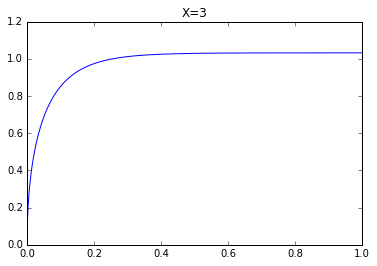

In [107]:
#Graficos

#Grafico para x=3 de la solucion de la integral
Sol = ErrorFunction(3)

# Valores en x para graficar
vx = [] 
suma = 0.0
for i in xrange(0,len(Sol)):
    suma = suma + 0.0001*2
    vx.append(suma)   
#print len(vx)   

#plt.figure( figsize=(5,5) )
plt.plot(vx,Sol)
plt.title("X=3")

In [108]:
"""
Vemos entonces en la grafica para x=3 que los valores de la integral tienden hacia un
valor constante de 1.
"""

'\nVemos entonces en la grafica para x=3 que los valores de la integral tienden hacia un\nvalor constante de 1.\n'

In [109]:
#2 Punto: The Fick's law 

In [110]:
# Se hacen los calculos para x=1
D = 1 # m/s**2
n_0 = 1

Ts = [0.2,0.7,2]
Xs = []

for t in Ts:
    Xs.append(1.0/(2*np.sqrt(D*t)))
print Xs

[1.1180339887498949, 0.59761430466719678, 0.35355339059327373]


In [111]:
#Densidades
n_1 = ErrorFunction(Xs[0])
n_2 = ErrorFunction(Xs[1])
n_3 = ErrorFunction(Xs[2])
unos = np.ones(len(n_1))

N_1 = []
N_2 = []
N_3 = []

for i in xrange(0,len(unos)):
    N_1.append(unos[i]-n_1[i])
    N_2.append(unos[i]-n_2[i])
    N_3.append(unos[i]-n_3[i])

El valor de la integral es  0.88496603921
El valor de la integral es  0.598660024164
El valor de la integral es  0.379390527813


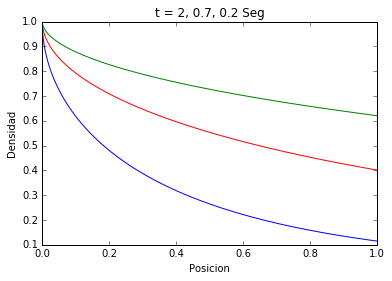

In [112]:
#Graficos
plt.plot(vx,N_1,'blue')
plt.plot(vx,N_2,'red')
plt.plot(vx,N_3,'green')

plt.title('t = 2, 0.7, 0.2 Seg')
plt.xlabel('Posicion')
plt.ylabel('Densidad')